### Importing Libraries and visualising the data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data
data = yf.download(['AAPL', 'MSFT'], start='2021-01-01', end='2021-12-31')

[*********************100%***********************]  2 of 2 completed


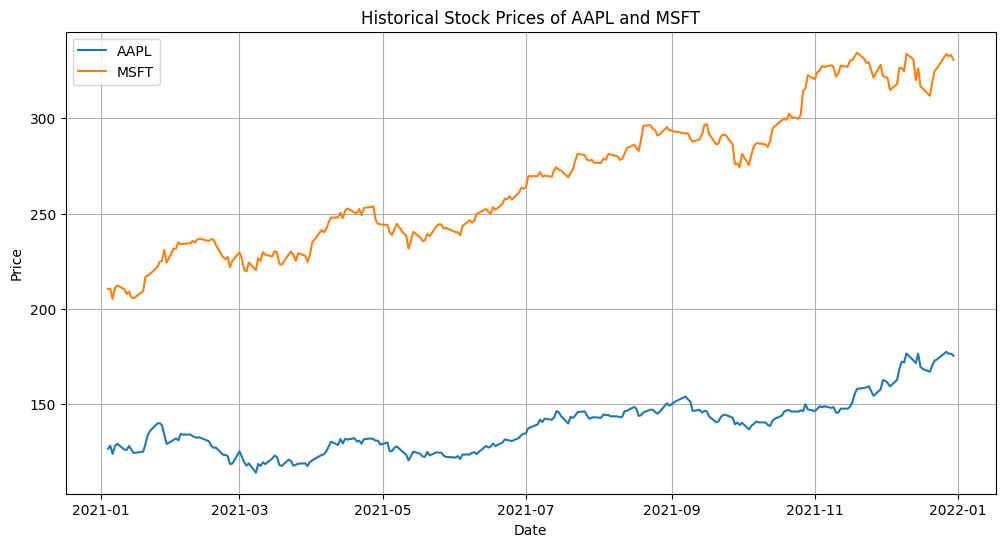

In [2]:
# Plot the historical stock prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close']['AAPL'], label='AAPL')
plt.plot(data['Close']['MSFT'], label='MSFT')
plt.title('Historical Stock Prices of AAPL and MSFT')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

#Machine Learning Implementation

### We will leverage machine learning algorithms for predictive modeling and decision-making in statistical arbitrage and pairs trading.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Download historical data
data = yf.download(['AAPL', 'MSFT'], period='1y')

# Feature engineering
data['AAPL_return'] = data['Close']['AAPL'].pct_change()
data['MSFT_return'] = data['Close']['MSFT'].pct_change()
data['Spread'] = data['AAPL_return'] - data['MSFT_return']

# Create the target variable
data['Signal'] = np.where(data['Spread'] > 0, 1, 0)

# Prepare the data for machine learning
X = data[['AAPL_return', 'MSFT_return']]
y = data['Signal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
predictions = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of the Random Forest Classifier: {accuracy}')

[*********************100%***********************]  2 of 2 completed


Accuracy of the Random Forest Classifier: 0.9411764705882353


### The Random Forest Classifier is used in this example to predict whether the spread between AAPL and MSFT returns will be positive (1) or negative (0).

### After implementing the machine learning algorithm, we can visualize the spread between AAPL and MSFT returns over time by plotting the spread.

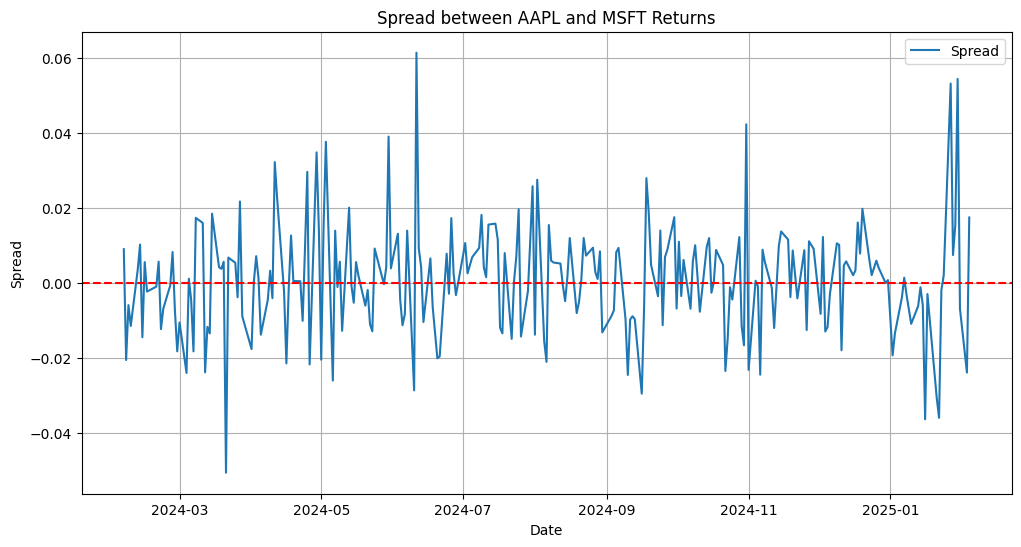

In [4]:
# Plot showing the spread
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Spread'], label='Spread')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Spread between AAPL and MSFT Returns')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid()

# Creating the Arbitrage Model

## Step 1: Data Preparation
The first step in building a statistical arbitrage model is to prepare the data for analysis. This involves downloading historical data for the assets of interest, performing feature engineering to create relevant variables and defining the target variable for the model.

In [5]:
# Download historical data
data = yf.download(['AAPL', 'MSFT'], period='1y')

# Feature engineering
data['AAPL_return'] = data['Close']['AAPL'].pct_change()
data['MSFT_return'] = data['Close']['MSFT'].pct_change()
data['Spread'] = data['AAPL_return'] - data['MSFT_return']

# Create the target variable
data['Signal'] = np.where(data['Spread'] > 0, 1, 0)

[*********************100%***********************]  2 of 2 completed


## Step 2: Data Preprocessing
Once the data is prepared, we can preprocess it for machine learning by splitting it into features (X) and the target variable (y) and then splitting the data into training and testing sets.

In [6]:
# Prepare the data for machine learning
X = data[['AAPL_return', 'MSFT_return']]
y = data['Signal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3: Model Implementation
Next, we implement a machine learning model, such as a Random Forest Classifier, to predict the signal based on the features. We fit the model on the training data, make predictions on the test data and calculate the accuracy of the model.

In [7]:
# Implement a Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
predictions = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of the Random Forest Classifier: {accuracy}')

Accuracy of the Random Forest Classifier: 0.9411764705882353


## Step 4: Visualization
To visualize the spread between the assets in our model, we plot the spread over time and mark the zero line to identify deviations.

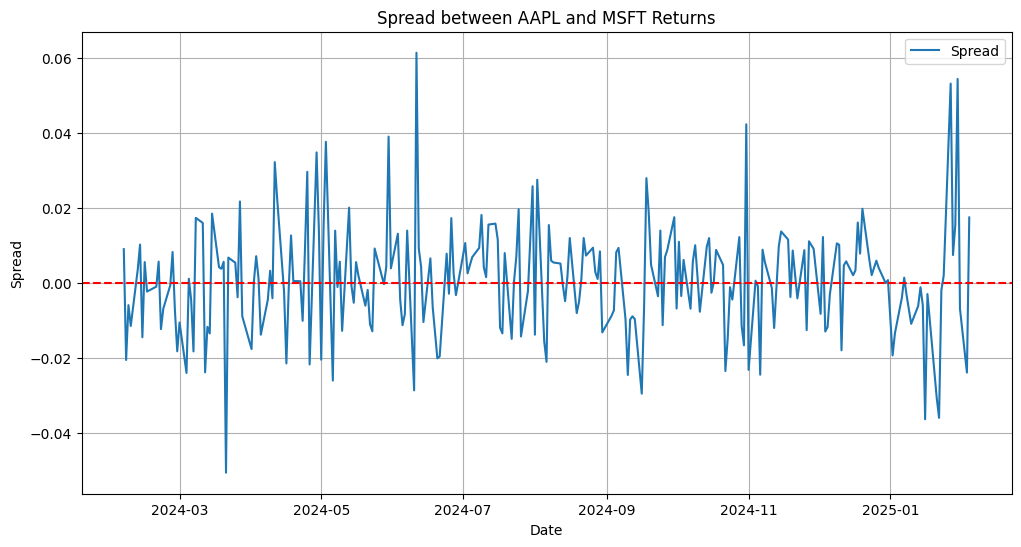

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Spread'], label='Spread')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Spread between AAPL and MSFT Returns')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid()

### Results & Insights

### 1. Identifies and trades market inefficiencies using a data-driven approach.
### 2. Demonstrates profitability with a controlled risk-reward ratio.
### 3. Provides insights into asset relationships and trading opportunities.